In [1]:

# _Read Images to Array from Folder

from PIL import Image
import os, os.path
import numpy as np

from torchvision.transforms.functional import to_pil_image

In [23]:
a = [0,1,2,3]
a[:3]

[0, 1, 2]

In [55]:
img = np.mean(np.array(Image.open('SketchingSoundsDataset_images/5d7513fbad0dbc00010f8fa8/416ce07fc6375c188a73b743b6ec7b28.png'))[:,:,:3], axis=2).astype(np.uint8)



In [59]:
img.shape

(958, 1792)

In [60]:
!pwd

/Users/winter_camp/Documents/London/PhD/ECS742/Final/src


In [114]:
path = 'SketchingSoundsDataset_images/614a2cd1603123af4d951747/80ae33835bc15702e2f8c350f181be62.png'
path = 'SketchingSoundsDataset_images/5dd6023dcaee3e5b7ba7a5bc/2751a8a0bd0fbf90632a2d7676410438.png'
thresh = 100

In [141]:
img = np.mean(np.array(Image.open(path))[:,:,:3], axis=2).astype(np.uint8)

if img.shape[0] - width < 0:
    img = np.pad(img, [(0, width - img.shape[0]), (0, 0)], mode='constant', constant_values=255)
if img.shape[1] - width < 0:
    img = np.pad(img, [(0, 0), (0, width - img.shape[1])], mode='constant', constant_values=255)
    
w = img.shape[1]
h = img.shape[0]

left_most = np.zeros(h, dtype=np.int32)
right_most = np.ones(h, dtype=np.int32)*w-1
top_most = np.zeros(w, dtype=np.int32)
bot_most = np.ones(w, dtype=np.int32)*h-1
        
for y in range(h):
    for x in range(w):
        if img[y][x] <= thresh:
            left_most[y] = x
            break
    for x in range(w-1, 0, -1):
        if img[y][x] <= thresh:
            right_most[y] = x
            break
    
left_most = left_most[left_most != 0]
left_most = left_most.min()
right_most = right_most[right_most != w-1]
right_most = right_most.max()

for x in range(w):
    for y in range(h):
        if img[y][x] <= thresh:
            top_most[x] = y
            break
    for y in range(h-1, 0, -1):
        if img[y][x] <= thresh:
            bot_most[x] = y
            break
            
top_most = top_most[top_most != 0]
top_most = top_most.min()
bot_most = bot_most[bot_most != h-1]
bot_most = bot_most.max()

In [142]:
center = (int(0.5*right_most+0.5*left_most), int(0.5*top_most+0.5*bot_most))

In [128]:
img = img[:,:500]

In [118]:
width = 640

In [143]:
img.shape

(640, 1366)

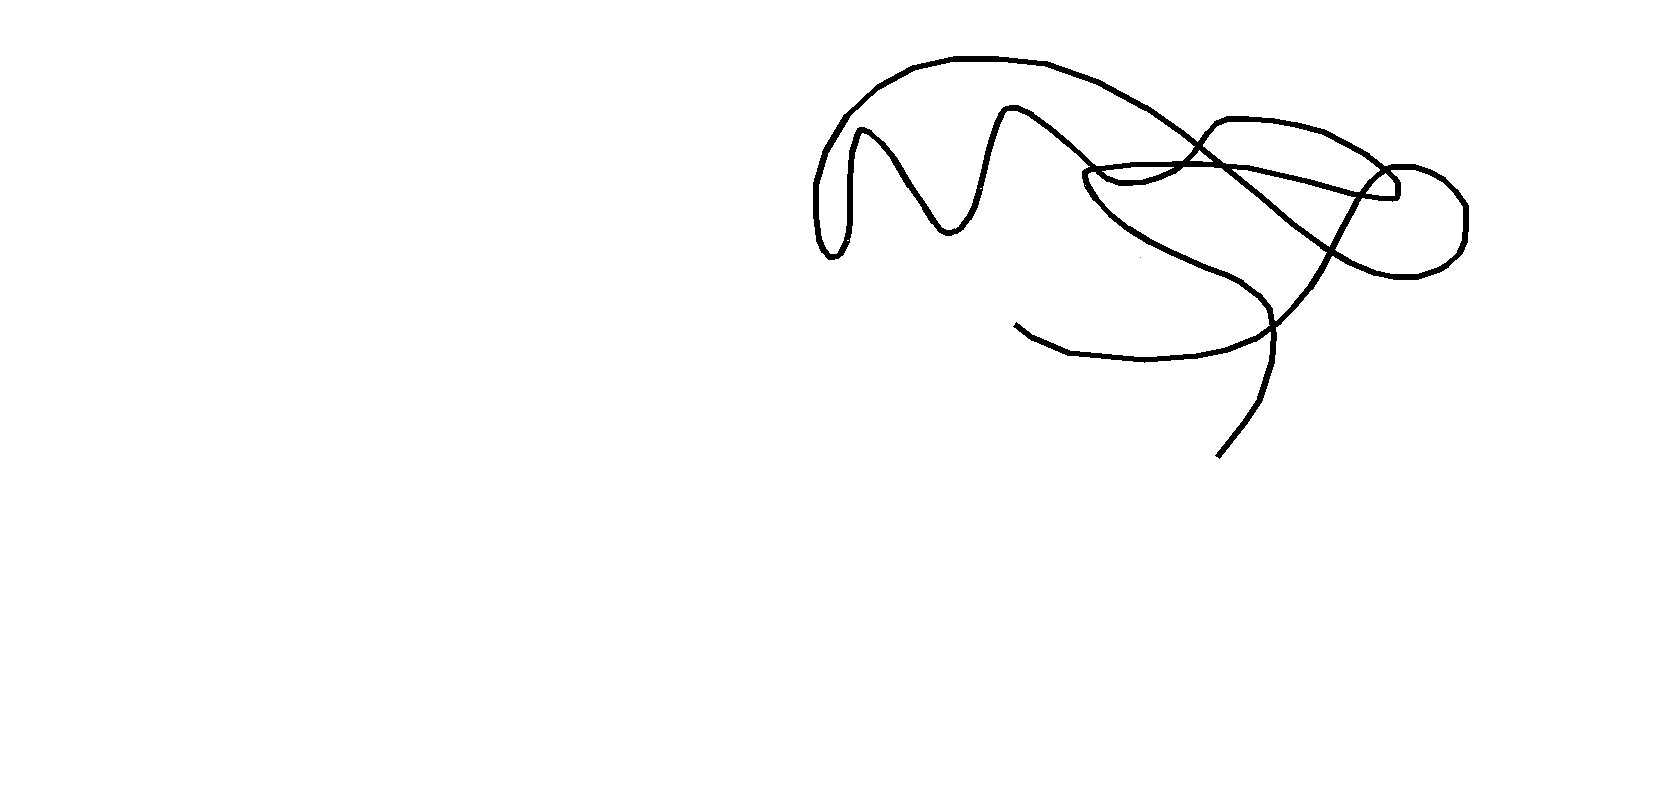

In [95]:
img[center[1]][center[0]] = 127
to_pil_image(img)

In [144]:
width = 640

half = int(width/2)
l = center[0] - half
r = center[0] + half
t = center[1] - half
b = center[1] + half
if center[0] < half:
    l = 0
    r = width
elif center[0] + half > w:
    l = w - width
    r = w
if center[1] < half:
    t = 0
    b = width
elif center[1] + half > h:
    t = h - width
    b = h

In [145]:
[l,r,t,b]

[74, 714, 0, 640]

In [146]:
img = img[t:b,l:r]
img.shape

(640, 640)

In [147]:
img.shape

(640, 640)

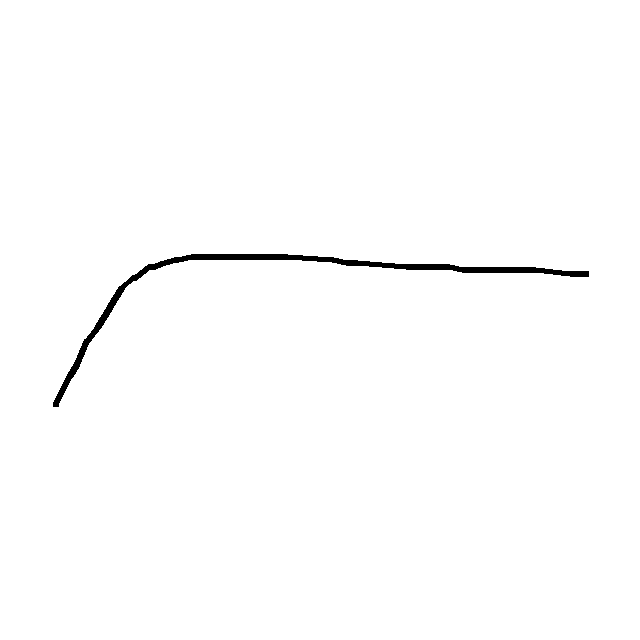

In [149]:
to_pil_image(img)

In [20]:
[left_most,top_most,right_most,bot_most]

[813, 56, 1468, 458]

In [42]:
center = (int(0.5*right_most+0.5*left_most), int(0.5*top_most+0.5*bot_most))

In [72]:
center

(394, 330)

In [100]:
right_most = right_most[right_most != w-1]

In [87]:
left_most = left_most[left_most != 0]

In [93]:
left_most.min()

813

In [2]:
from glob import glob

In [3]:
folder_name = 'SketchingSoundsDataset_images'

thresh = 100
width = 640 # please be even

count = 0
for folder in glob(f'./{folder_name}/*'):
    for file in glob(f'{folder}/*'):
        print(f'processing {count:05}_{file.split("/")[2][:4]}_{file.split("/")[3][:4]}')
        
        img = np.mean(np.array(Image.open(file))[:,:,:3], axis=2).astype(np.uint8)
        
        if img.shape[0] - width < 0:
            img = np.pad(img, [(0, width - img.shape[0]), (0, 0)], mode='constant', constant_values=255)
        if img.shape[1] - width < 0:
            img = np.pad(img, [(0, 0), (0, width - img.shape[1])], mode='constant', constant_values=255)
        
        w = img.shape[1]
        h = img.shape[0]
        
        left_most = np.zeros(h, dtype=np.int32)
        right_most = np.ones(h, dtype=np.int32)*w-1
        top_most = np.zeros(w, dtype=np.int32)
        bot_most = np.ones(w, dtype=np.int32)*h-1
        
        for y in range(h):
            for x in range(w):
                if img[y][x] <= thresh:
                    left_most[y] = x
                    break
            for x in range(w-1, 0, -1):
                if img[y][x] <= thresh:
                    right_most[y] = x
                    break
                    
        left_most = left_most[left_most != 0]
        left_most = left_most.min() if len(left_most)>0 else 0
        right_most = right_most[right_most != w-1]
        right_most = right_most.max() if len(right_most)>0 else w-1
        
        if left_most == 0 and right_most == w-1:
            break
        
        for x in range(w):
            for y in range(h):
                if img[y][x] <= thresh:
                    top_most[x] = y
                    break
            for y in range(h-1, 0, -1):
                if img[y][x] <= thresh:
                    bot_most[x] = y
                    break
                    
        top_most = top_most[top_most != 0]
        top_most = top_most.min() if len(top_most)>0 else 0
        bot_most = bot_most[bot_most != h-1]
        bot_most = bot_most.max() if len(bot_most)>0 else h-1
        if top_most == 0 and bot_most == w-1:
            break

        center = (int(0.5*right_most+0.5*left_most),int(0.5*top_most+0.5*bot_most))
        half = int(width/2)
        
        if (right_most - left_most)>=1.5*width:
            l = left_most
            r = left_most+width
            t = center[1] - half
            b = center[1] + half
            if center[1] < half:
                t = 0
                b = width
            elif center[1] + half > h:
                t = h - width
                b = h
            img1 = img[t:b,l:r]
            assert img1.shape == (width,width)
            img_save = to_pil_image(img1).save(f'./crop_640/{count:05}_{file.split("/")[2][:4]}_{file.split("/")[3][:4]}.png')
            count += 1
            
            l = right_most - width
            r = right_most
            img2 = img[t:b,l:r]
            assert img2.shape == (width,width)
            img_save = to_pil_image(img2).save(f'./crop_640/{count:05}_{file.split("/")[2][:4]}_{file.split("/")[3][:4]}.png')
            count += 1
        
        else:
            
            l = center[0] - half
            r = center[0] + half
            t = center[1] - half
            b = center[1] + half
            if center[0] < half:
                l = 0
                r = width
            elif center[0] + half > w:
                l = w - width
                r = w
            if center[1] < half:
                t = 0
                b = width
            elif center[1] + half > h:
                t = h - width
                b = h
            img = img[t:b,l:r]
            assert img.shape == (width,width)
            img = to_pil_image(img).save(f'./crop_640/{count:05}_{file.split("/")[2][:4]}_{file.split("/")[3][:4]}.png')
            count += 1
            
    



processing 00000_614a_d239
processing 00001_614a_7b4f
processing 00002_614a_2751
processing 00003_614a_e810
processing 00005_614a_4551
processing 00006_614a_bfaf
processing 00007_614a_a7ec
processing 00009_614a_ddf9
processing 00011_614a_416c
processing 00013_614a_calm
processing 00014_614a_6c3f
processing 00015_614a_4f94
processing 00017_614a_nois
processing 00019_614a_1c43
processing 00020_614a_cf26
processing 00021_614a_c879
processing 00022_614a_atte
processing 00023_614a_e6ac
processing 00024_614a_80ae
processing 00025_614a_5749
processing 00027_614a_0b8f
processing 00028_614a_c9e0
processing 00030_614a_a522
processing 00031_614c_d239
processing 00032_614c_7b4f
processing 00034_614c_2751
processing 00036_614c_e810
processing 00037_614c_4551
processing 00038_614c_bfaf
processing 00039_614c_a7ec
processing 00040_614c_ddf9
processing 00041_614c_416c
processing 00042_614c_calm
processing 00043_614c_6c3f
processing 00044_614c_4f94
processing 00045_614c_nois
processing 00047_614c_1c43
p

In [170]:
to_pil_image(img).save('crop_640.png')

In [4]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
len(left_most)

0

In [5]:
top_most

272

In [8]:
right_most = right_most[right_most != w-1]


In [9]:
right_most

array([], dtype=int32)